## CNN(Convolution Neural Network)

- CNN은 이미지를 보고 그 안에 무엇이 있는지 인식하는 인공지능 모델
- 예) 고양이 사진을 보여주면 "고양이"라고 맞추는 것

- 기존 딥러닝 모델과 다르게 CNN은 이미지의 공간 구조(위치 패턴)을 이해함

#### CNN이 하는 일
> Convolution(합성곱)  
    - 이미지에서 특징(모서리, 색 변화 등)을 찾아냄  

> ReLU   
    - 음수값을 0으로 만들어서 계산 단순화

> Pooling(풀링)  
    - 이미지 크기를 줄이면서 중요한 정보만 남김

> Fully Connected  
    - 최종 분류

[CNN 구조]
1. 입력층: 28 x 28 이미지
2. Conv2D + ReLU: 이미지 특징 추출
3. MaxPooling: 정보 요약
4. Conv2D + ReLU: 더 복잡한 특징 추출
5. MaxPooling: 크기 축소
6. Flatten: 1차원 벡터로 변환
7. Dense: 분류기 역할
8. Softmax: 예측 결과 출력

In [32]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# MNIST 숫자 데이터 불러오기
# x_train: 훈련용 이미지(60,000장)
# y_train: 각 이미지의 라벨
# x_test, y_test: 평가용 이미지와 정답(10,000장)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

> ##### 데이터 전처리
reshape: 이미지 형태를 (28, 28) -> (28, 28, 1)로 변환  
CNN은 색깔(채널) 정보를 3차원으로 받기 때문에  
0: 검은색, 255: 하얀색, 128: 대략 회색  
255에 가까울 수록 밝고, 0에 가까울 수록 어두움  
x_train[0][10][10] = 255 -> 이미지의 10행 10열의 픽셀이 힌색이라는 의미  

> /255.0으로 정규화 하는 이유
- 픽셀 값은 0~255 사이의 정수로 계산하면 불편
- 모든 픽셀 값을 255로 나누어 0.0~1.0 사이의 실수값으로 변경 => 정규화(Normalization)
- -1: 이미지가 몇장인지 자동으로 계산  
    60,000으로 입력하지 않아도 가능

In [5]:
# 데이터 전처리
x_trian = x_train.reshape(-1, 28, 28, 1).astype("float32")/255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32")/255.0

> ##### CNN 모델 생성
- Conv2D: 특징 추출(이미지에서 모양, 선 등의 패턴을 찾음)
(32, (3,3))
32: 필터(커널)의 개수
(3,3): 필터 크기 -> 한 번에 9개의 픽셀을 보고서 추출

- MaxPooling2D: 정보 압출
- Flatten: 평탄화(2D -> 1D로 펼쳐서 계산할 수 있도록 만들어줌)
- Dense: 완전 연결층(Fully Conneceted)
- Softmax: 확률화(10개의 클래스 0~9 중 어느 숫자인지 확률로 예측)

In [7]:
# CNN 모델 만들기
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # 필터 32개
    layers.MaxPooling2D((2,2)),  # 크기를 반으로 줄이기
    layers.Conv2D(64, (3,3), activation='relu'),    # 더 깊은 특징 추출
    layers.MaxPooling2D(2,2),
    layers.Flatten(),   # 1차원 벡터로 펼치기
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 숫자 0~9로 분류
])

In [8]:
# 모델 컴파일(바이브 코딩)
# adam: 모델을 빠르고 안정적으로 학습 시킴
# sparse_categorical_crossentropy: 분류 문제에 특화됨
# metrics=['accuracy']: 정확도를 기준으로 평가
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 구조 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 모델 학습
hist = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.2    # 과적합 방지를 위함
    )

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9953 - loss: 0.0182 - val_accuracy: 0.9902 - val_loss: 0.0530
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9957 - loss: 0.0171 - val_accuracy: 0.9918 - val_loss: 0.0481
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9959 - loss: 0.0148 - val_accuracy: 0.9876 - val_loss: 0.0749
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9962 - loss: 0.0153 - val_accuracy: 0.9887 - val_loss: 0.0696
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9961 - loss: 0.0158 - val_accuracy: 0.9894 - val_loss: 0.0580


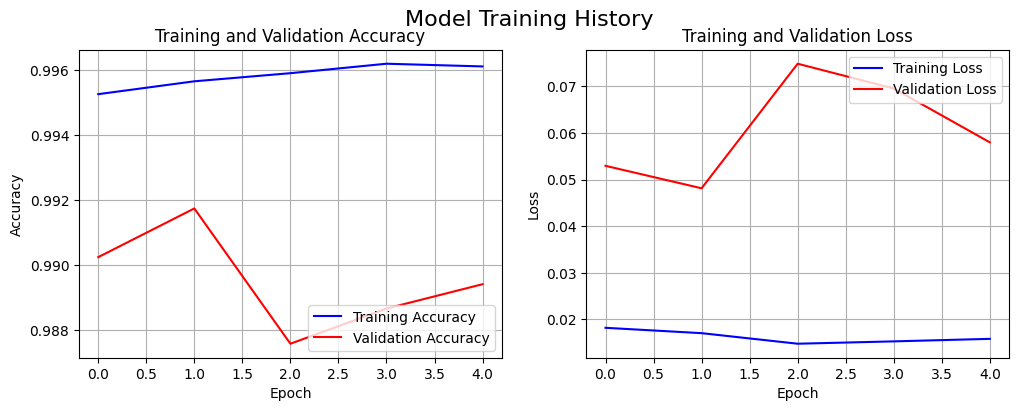

In [28]:
# 모델 평가 시각화
plt.figure(figsize=(12, 4))

# history 객체에서 훈련 및 검증 데이터를 추출합니다.
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# 정확도(Accuracy) 그래프
plt.subplot(1, 2, 1)
plt.plot(acc, 'b', label='Training Accuracy')
plt.plot(val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# 손실(Loss) 그래프W
plt.subplot(1, 2, 2)
plt.plot(loss, 'b', label='Training Loss')
plt.plot(val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# 그래프를 화면에 표시합니다.
plt.suptitle('Model Training History', fontsize=16)
plt.show()

In [33]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9866 - loss: 0.0973
Test Accuracy: 0.99


In [34]:
# 예측
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


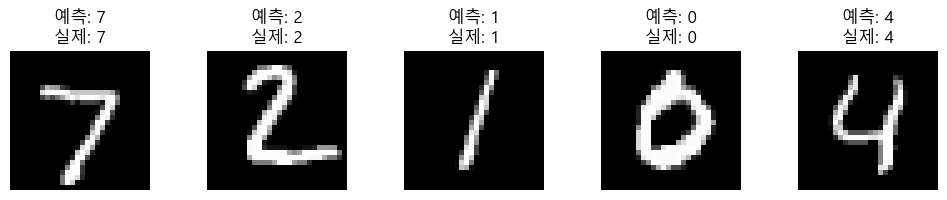

In [38]:
# 한글 깨짐 방지 방법
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"예측: {predicted_classes[i]}\n실제: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()